### Import Libraries

In [1]:
"If it does not work use code below while running this notebook in this dir."
# import sys
# import os
# sys.path.append(os.path.abspath(os.getcwd()))

from mytorch import Tensor, Model
from mytorch import activation as active_func
from mytorch import loss as loss_func
from mytorch import optimizer as optim 
from mytorch import layer as nn
from mytorch.util import DataLoader

from mytorch.util import flatten

import matplotlib.pyplot as plt
import numpy as np

### Load MNIST

In [2]:
"""
load data set with given data loader.
you have 10000 train data, 1000 for each number, remember to shuffle training data.
you have 1000 test data, 100 for each number.

loaded data is a list of (img, label)
type of img is Tensor.

TODO: you have to get this list and create batches for training.
you can also apply this changes later in the Training part for convenience.
"""
data_loader = DataLoader(train_addr='MNIST/train', test_addr='MNIST/test')
data_loader.load()
"you can see how data is loaded"
print(len(data_loader.getTrain()))
print(data_loader.getTrain()[0][1].shape)

loading train...
loading test...
processing...
50
(200,)


### Define and Create your Model

In [3]:
class MyModel(Model):
    def __init__(self):
        "TODO: define your layers. order is important" 
        self.fc1 = nn.Linear(784,512,need_bias = True)
        self.fc2 = nn.Linear(512,64,need_bias = True)
        self.fc3 = nn.Linear(64,10,need_bias = True)

    def forward(self, x: Tensor) -> Tensor:
        "TODO: define forward pass"
        y = active_func.relu(self.fc1(x))
        y = active_func.relu(self.fc2(y))
        y = active_func.softmax(self.fc3(y))
        return y

model = MyModel()
print(model.summary())

fc1:  linear - total param: 401408 - in: 784, out: 512
fc2:  linear - total param: 32768 - in: 512, out: 64
fc3:  linear - total param: 640 - in: 64, out: 10
None


### Choose a Loss Function

In [4]:
"TODO: choose a proper loss function"
criterion = loss_func.CategoricalCrossEntropy

### Choose an Optimizer

In [5]:
"TODO: choose a proper optimizer"
optimizer = optimizer = optim.SGD(model.parameters(),learning_rate = 0.00001)
# optimizer = optimizer = optim.RMSprop(model.parameters())

### Training Model

In [6]:
def reshape(x: Tensor, newShape) -> Tensor:
    data = x.data.reshape(newShape)
    req_grad =x.requires_grad
    depends_on = x.depends_on
    return Tensor(data=data, requires_grad=req_grad, depends_on=depends_on)

In [7]:
"TODO: define number of epoch and train batches of data on your model. also test each epoch."
EPOCH = 45

train_acc = []
test_acc = []
best_train_acc = 0.0
best_test_acc = 0.0

for i in range(EPOCH):
    "TODO: train over your defined batches and save train accuracy for each epoch."
    print(i)
    total_acc = 0.0
    for batch in data_loader.getTrain():
        x = batch[0]
        x = reshape(x, (-1, 784))
        labels = batch[1].data
        labels = np.array(labels)
        actual_data = np.zeros((len(labels), 10))
        actual_data[np.arange(len(labels)), labels] = 1
        actual = Tensor(data=actual_data,requires_grad=False,depends_on=None)
        
        optimizer.zero_grad()
        predicted = model.forward(x)
        loss = criterion(predicted, actual)
        loss.backward()
        optimizer.step()
        
        #evaluating
        predicted_bool = np.round(predicted.data).astype(bool)
        actual_bool = (actual.data).astype(bool)
        correct = np.sum(predicted_bool & actual_bool)
        total = actual_bool.shape[0]
        accuracy = correct/total
        total_acc += accuracy
    epoch_acc = total_acc / 50
    print(i,"train",epoch_acc)
    train_acc.append(epoch_acc)
    best_train_acc = max(best_train_acc,epoch_acc)
    
    "TODO: test your model after each training and save test accuracy for each epoch."
    total_acc = 0.0
    for batch in data_loader.getTest():
        x_test = batch[0]
        x_test = reshape(x_test, (-1, 784))
        labels = batch[1].data
        labels = np.array(labels)
        actual_data = np.zeros((len(labels), 10))
        actual_data[np.arange(len(labels)), labels] = 1
        actual = Tensor(data=actual_data,requires_grad=False,depends_on=None)
        
        predicted = model.forward(x_test)
        predicted_bool = np.round(predicted.data).astype(bool)
        actual_bool = (actual.data).astype(bool)
        correct = np.sum(predicted_bool & actual_bool)
        total = actual_bool.shape[0]
        accuracy = correct/total
        total_acc += accuracy
    epoch_acc = total_acc / 5
    print(i,"test",epoch_acc)
    test_acc.append(epoch_acc)
    best_test_acc = max(best_test_acc,epoch_acc)


0
0 train 0.35889999999999994
0 test 0.42299999999999993
1
1 train 0.4987
1 test 0.558
2
2 train 0.6192
2 test 0.635
3
3 train 0.6973999999999999
3 test 0.688
4
4 train 0.7467000000000001
4 test 0.72
5
5 train 0.7764000000000002
5 test 0.7620000000000001
6
6 train 0.8025999999999996
6 test 0.774
7
7 train 0.8203
7 test 0.782
8
8 train 0.8364000000000001
8 test 0.7949999999999999
9
9 train 0.8476000000000002
9 test 0.8019999999999999
10
10 train 0.8565
10 test 0.807
11
11 train 0.8665999999999998
11 test 0.817
12
12 train 0.8747999999999999
12 test 0.8220000000000001
13
13 train 0.8807000000000003
13 test 0.825
14
14 train 0.8875000000000003
14 test 0.829
15
15 train 0.8932000000000003
15 test 0.8309999999999998
16
16 train 0.8968000000000003
16 test 0.8370000000000001
17
17 train 0.9024000000000002
17 test 0.8400000000000001
18
18 train 0.9071000000000002
18 test 0.841
19
19 train 0.9125999999999996
19 test 0.844
20
20 train 0.9163000000000001
20 test 0.8459999999999999
21
21 train 0.9

### Evaluate Model Performance

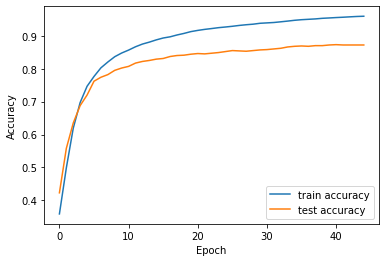


On train - best accuracy: 0.96, final accuracy: 0.96
On test - best accuracy: 0.87, final accuracy: 0.87


In [8]:
plt.plot(train_acc, label='train accuracy')
plt.plot(test_acc, label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show();

print("\nOn train - best accuracy: {:.2f}, final accuracy: {:.2f}".format(best_train_acc, train_acc[-1]))
print("On test - best accuracy: {:.2f}, final accuracy: {:.2f}".format(best_test_acc, test_acc[-1]))